In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
x = np.array([1, 2, 3, 4, 5])
x.shape

(5,)

In [3]:
np.clip(x, 2, 4)

array([2, 2, 3, 4, 4])

In [4]:
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])
with tf.Session() as sess:
    print(sess.run(tf.clip_by_value(y, 3, 5)))


[3 3 3 4 5 5 5 5]


In [5]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x.shape

(2, 3)

In [6]:
xr = x.reshape(1, 2, 3)
xr.shape

(1, 2, 3)

In [7]:
len(x)
xr.flatten()

array([1, 2, 3, 4, 5, 6])

In [8]:
y0 = np.zeros(shape=y.shape)
y0

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x2 = np.tile(x, (2, 1, 1))
x2

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [10]:
x3 = np.zeros(shape=(3, 2, 3))
x3[0, ...] = x
x3[2, ...] = x
x3

array([[[1., 2., 3.],
        [4., 5., 6.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[1., 2., 3.],
        [4., 5., 6.]]])

In [11]:
[0] + [1, 2, 33, 5]

[0, 1, 2, 33, 5]

In [12]:
np.zeros(5 * 2).shape

(10,)

In [13]:
np.zeros((5 * 2)).shape

(10,)

In [14]:
np.math.ceil(5/ 2)

3

In [15]:
l1 = np.zeros(10)
l1[2:5] = 5
l1

array([0., 0., 5., 5., 5., 0., 0., 0., 0., 0.])

In [16]:
dict1 = {1: 2, 3: 4, 0.2: 2}

In [17]:
len(dict1)

3

In [18]:
dict2 = dict.fromkeys([0.1, 0.2, 0.3])
dict2

{0.1: None, 0.2: None, 0.3: None}

In [19]:
np.zeros(2).shape

(2,)

In [20]:
np.repeat([1, 2], 3, axis=0)

array([1, 1, 1, 2, 2, 2])

In [21]:
np.tile([0, 1], 3)

array([0, 1, 0, 1, 0, 1])

In [22]:
1000 / 2

500.0

In [23]:
np.hstack([np.ndarray([1, 2]), np.ndarray([1, 2]), np.ndarray([1, 2]), np.ndarray([1, 2])]).shape

(1, 8)

In [24]:
np.hstack([[1, 2], [1, 2], [1, 2]])

array([1, 2, 1, 2, 1, 2])

In [25]:
x = np.array([3, 4, 5, 6, 7, 8, 9, 10])

In [26]:
y

array([1, 2, 3, 4, 5, 6, 7, 8])

In [27]:
np.sum(np.abs(y - x))

16

In [28]:
np.abs(y - x)

array([2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
x[:4]

array([3, 4, 5, 6])

In [30]:
x[-4:]

array([ 7,  8,  9, 10])

In [31]:
z = np.array([])
np.hstack([z, np.array([9, 10, 11])])

array([ 9., 10., 11.])

In [32]:
np.hstack([np.zeros(5), np.ones(3)])

array([0., 0., 0., 0., 0., 1., 1., 1.])

In [33]:
ids = np.array([3, 4])
x[ids]

array([6, 7])

In [34]:
s1 = np.random.seed()
s1

In [35]:
print(dict1)
np.save('dict1.npy', dict1)

{1: 2, 3: 4, 0.2: 2}


In [36]:
read_dict1 = np.load('dict1.npy')
type(read_dict1.item())

dict

In [37]:
read_dict1.item()

{1: 2, 3: 4, 0.2: 2}

In [38]:
c = tf.random_normal([2, 3], mean=-1, stddev=4)

In [39]:
state = tf.Variable(0)
new = tf.add(state, tf.constant(1))
update = tf.assign(state, new)

In [40]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(state))
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))

0
1
2
3
4
5


### convert numpy array to TF tensor

In [41]:
tx = tf.convert_to_tensor(x)
with tf.Session() as sess:
    print(sess.run(tx))

[ 3  4  5  6  7  8  9 10]


### Linear regression

1. create data points

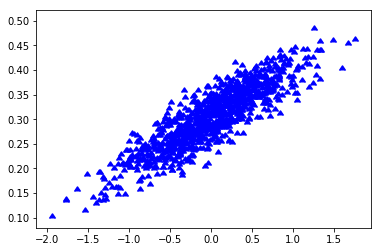

In [42]:
num_points = 1000
v_set = []
x_data = []
y_data = []
for i in range(num_points):
    x1 = np.random.normal(0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0, 0.03)
    v_set.append([x1, y1])
    x_data.append(x1)
    y_data.append(y1)

plt.scatter(x_data, y_data, c='b', marker=10)
plt.show()


In [43]:
W = tf.Variable(tf.random_uniform([1], -1, 1), name='W')
b = tf.Variable(tf.zeros([1]), name='b')

In [44]:
y = W * x_data + b
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss, name='train')

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for step in range(30):
    sess.run(train)
    print('W = {}, b = {}, loss = {}'.format(sess.run(W), sess.run(b), sess.run(loss)))

W = [0.25879404], b = [0.30303237], loss = 0.00897208321839571
W = [0.20832211], b = [0.30207062], loss = 0.004678654484450817
W = [0.17375842], b = [0.30145702], loss = 0.0026652836240828037
W = [0.1500894], b = [0.3010368], loss = 0.0017211271915584803
W = [0.133881], b = [0.30074906], loss = 0.0012783713173121214
W = [0.12278158], b = [0.300552], loss = 0.0010707442415878177
W = [0.11518076], b = [0.30041707], loss = 0.0009733789484016597
W = [0.10997576], b = [0.30032468], loss = 0.0009277200442738831
W = [0.10641141], b = [0.3002614], loss = 0.0009063087636604905
W = [0.10397056], b = [0.30021808], loss = 0.0008962680003605783
W = [0.10229909], b = [0.3001884], loss = 0.0008915594662539661
W = [0.10115447], b = [0.30016807], loss = 0.0008893514168448746
W = [0.10037065], b = [0.30015415], loss = 0.0008883160189725459
W = [0.09983388], b = [0.3001446], loss = 0.0008878305088728666
W = [0.09946632], b = [0.3001381], loss = 0.0008876027422957122
W = [0.09921461], b = [0.30013362], lo

### Logistic regression

1. prepare MNIST data

In [59]:
from keras.datasets import mnist

In [60]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Shapes of dataset:\n training: x = {}, y = {}; testing: x = {}, y = {}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Shapes of dataset:
 training: x = (60000, 28, 28), y = (60000,); testing: x = (10000, 28, 28), y = (10000,)


In [61]:
print('before: ', x_train.dtype)
x_train, x_test = x_train / 255.0, x_test / 255.0
print('after: ', x_train.dtype)

before:  uint8
after:  float64
